In [1]:
#installing the necessary libraries for analysis and downloading the NLTK shell
import nltk; import pandas as pd 

In [3]:
#nltk.download_shell()

In [24]:
messages = [line.rstrip() for line in open(r'SMSSpamCollection')]

In [25]:
#outputing the actual messages in from the file
for mess_no,messages in enumerate(messages[:10]):
    print(mess_no,messages)
    print('\n')

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


1 ham	Ok lar... Joking wif u oni...


2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's


3 ham	U dun say so early hor... U c already then say...


4 ham	Nah I don't think he goes to usf, he lives around here though


5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, Â£1.50 to rcv


6 ham	Even my brother is not like to speak with me. They treat me like aids patent.


7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune


8 spam	WINNER!! As a valued network customer you have been selected to receivea Â£900 prize reward! To claim call 09061701461. Claim cod

In [28]:
#making a dataframe of the data by separating the values by their '\t' delimiter
messages = pd.read_csv(r'SMSSpamCollection',sep = '\t',names=['label','message'])
messages.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [30]:
#overview of the dataframe
messages.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [31]:
#looking at the number of spam and non-spam messages, number of unique messages and most frequent messages
messages.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [33]:
#adding a calculated field that shows the length of messages
messages['length'] = messages['message'].apply(len)
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [37]:
#some libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

<AxesSubplot:ylabel='Frequency'>

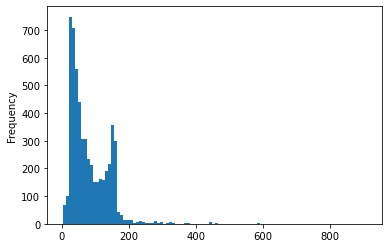

In [41]:
#histogram showing the distribution of message length
messages['length'].plot(kind='hist',bins=100)

In [43]:
#some statitics to guide our analysis
messages['length'].describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

In [52]:
#looking at the outliers (longest message)
messages[messages['length']==910]['message'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

array([<AxesSubplot:title={'center':'ham'}>,
       <AxesSubplot:title={'center':'spam'}>], dtype=object)

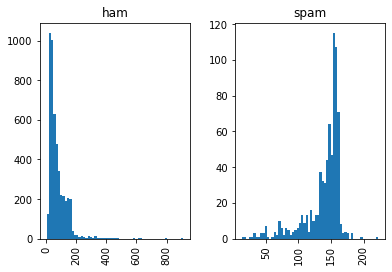

In [55]:
#different distributions of spam and non-spam messages
messages.hist(column='length',by='label',bins=60)

In [3]:
#prototyping the string library with a sample text message
import string
mess= 'Sample string: Notice, it has punctuation!'
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [4]:
#vectorizing our prototype as per TF-IDF conventions
no_punc = [c for c in mess if c not in string.punctuation]
no_punc

['S',
 'a',
 'm',
 'p',
 'l',
 'e',
 ' ',
 's',
 't',
 'r',
 'i',
 'n',
 'g',
 ' ',
 'N',
 'o',
 't',
 'i',
 'c',
 'e',
 ' ',
 'i',
 't',
 ' ',
 'h',
 'a',
 's',
 ' ',
 'p',
 'u',
 'n',
 'c',
 't',
 'u',
 'a',
 't',
 'i',
 'o',
 'n']

In [11]:
no_punc=''.join(no_punc) #the blank space ('') here is the delimeter were choosing to create a sentence from the split string above

In [12]:
no_punc

'Sample string Notice it has punctuation'

In [13]:
from nltk.corpus import stopwords
#filtering out stopwords to get unique words

In [15]:
#stopwords.words('english')

In [18]:
no_punc=no_punc.split()

In [19]:
clean_mess=[word for word in no_punc if word not in stopwords.words('english')]

In [20]:
clean_mess

['Sample', 'string', 'Notice', 'punctuation']

In [37]:
def text_process(mess):
    """
    1. remove punctuation
    2.remove stopwords
    3.return list of clean text
    
    """
    no_punc = [c for c in mess if mess not in string.punctuation]
    
    no_punc = ''.join(no_punc)
    
    clean_mess = [word for word in no_punc.split() if word.lower not in stopwords.words('english')]
    
    return (clean_mess)

In [39]:
from sklearn.feature_extraction.text import CountVectorizer

bow_tranformer = CountVectorizer(analyzer=text_process).fit(messages['message'])

In [49]:
mess4=messages['message'][3]
mess4

'U dun say so early hor... U c already then say...'

In [50]:
bow4= bow_tranformer.transform([mess4])

In [54]:
#vectorizing all the words in the dataset into a bag-of-words
print(bow4)

  (0, 5205)	2
  (0, 5976)	1
  (0, 6868)	1
  (0, 8181)	1
  (0, 8210)	1
  (0, 9596)	1
  (0, 12984)	1
  (0, 12988)	1
  (0, 13475)	1
  (0, 14174)	1


In [58]:
#the shape of our bag of words
print(bow4.shape)

(1, 15691)


In [64]:
#get_feature_names is a function of sci-kit learn's feature_extraction that lets you see the actual value of the
#vectorized word
bow_tranformer.get_feature_names()[5205]

'U'

In [65]:
#transforming our bag of words into as sparse matrix for correlation and classification 
messages_bow = bow_tranformer.transform(messages['message'])

In [67]:
print('The shape of the sparse matrix is ', messages_bow.shape)

The shape of the sparse matrix is  (5572, 15691)


In [68]:
messages_bow.nnz #non-zero occurences

81082

In [69]:
from sklearn.feature_extraction.text import TfidfTransformer
#using the statistical approach of TF-IDF which is a fundamental technique of NLP

In [73]:
TfidfTransf=TfidfTransformer().fit(messages_bow)

In [74]:
Tfid4 = TfidfTransf.transform(bow4)

In [77]:
#each word and its associated Inverse Document Frequency
print(Tfid4)

  (0, 14174)	0.2284919786755927
  (0, 13475)	0.1950426208457024
  (0, 12988)	0.4037526179460337
  (0, 12984)	0.2628019458253699
  (0, 9596)	0.41784981779796465
  (0, 8210)	0.31595155648596857
  (0, 8181)	0.2851480315217324
  (0, 6868)	0.2851480315217324
  (0, 5976)	0.2840710056302651
  (0, 5205)	0.399912190644083


In [79]:
#testing the IDF (inverse document frequency) of the word `"u"` and of word `"university"`?
print(TfidfTransf.idf_[bow_tranformer.vocabulary_['u']])
print(TfidfTransf.idf_[bow_tranformer.vocabulary_['university']])

3.3757135453100533
8.527076498901426


In [81]:
#transforming the entire bag-of-words corpus into TF-IDF corpus at once:
messages_tfidf = TfidfTransf.transform(messages_bow)
print(messages_tfidf.shape)

(5572, 15691)


In [82]:
#building and training a model for classifaction
from sklearn.naive_bayes import MultinomialNB
spam_detect_model = MultinomialNB().fit(messages_tfidf, messages['label'])

In [83]:
all_predictions = spam_detect_model.predict(messages_tfidf)
print(all_predictions)

['ham' 'ham' 'spam' ... 'ham' 'ham' 'ham']


In [84]:
#We can use SciKit Learn's built-in classification report, which returns [precision, recall,f1-score] to test accuracy
from sklearn.metrics import classification_report
print (classification_report(messages['label'], all_predictions))

              precision    recall  f1-score   support

         ham       0.96      1.00      0.98      4825
        spam       1.00      0.75      0.86       747

    accuracy                           0.97      5572
   macro avg       0.98      0.88      0.92      5572
weighted avg       0.97      0.97      0.96      5572



In [85]:
from sklearn.model_selection import train_test_split

msg_train, msg_test, label_train, label_test = train_test_split(messages['message'], messages['label'], test_size=0.2)

print(len(msg_train), len(msg_test), len(msg_train) + len(msg_test))

4457 1115 5572


In [86]:
# Using SciKit Learn's capabilities to store a pipeline of workflow. 
# allowing the set up of all the transformations that we will do to the data for future use. 

from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

In [87]:
# Now I can directly pass message text data and the pipeline will do all the pre-processing.
# We can treat it as a model/estimator API:
pipeline.fit(msg_train,label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x000001E9948DD0D0>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [88]:
predictions = pipeline.predict(msg_test)

In [89]:
print(classification_report(predictions,label_test))

              precision    recall  f1-score   support

         ham       1.00      0.94      0.97      1033
        spam       0.57      1.00      0.73        82

    accuracy                           0.94      1115
   macro avg       0.78      0.97      0.85      1115
weighted avg       0.97      0.94      0.95      1115

